In [1]:
import nltk
nltk.download('wordnet')

##from google.colab import files
#uploaded = files.upload()

[nltk_data] Downloading package wordnet to /home/maad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import pandas as pd
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score
import seaborn as sns
import sklearn

In [3]:
df = pd.read_excel("AllCombineDataVersion2.xlsx", sheet_name=None, ignore_index=True, sort=True)
data = pd.concat(df.values(), ignore_index=True, sort=False)

FileNotFoundError: [Errno 2] No such file or directory: 'AllCombineDataVersion2.xlsx'

In [59]:
data.isna().sum()

Unnamed: 0            0
Tag                   0
Tweet_text            0
Unnamed: 0.1          0
Unnamed: 0.1.1    23090
dtype: int64

In [60]:
data['Tag'].value_counts()

PT    7426
WB    5386
ST    4148
EN    3902
ED    3848
SP    3356
SI    3320
HT    2939
BN    2927
RE    2847
GM    2616
NW     713
Name: Tag, dtype: int64

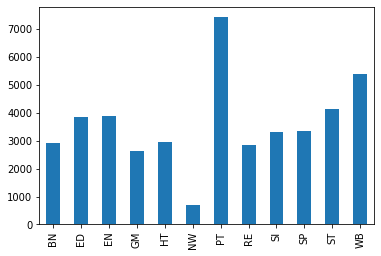

In [61]:
data['Tag'].value_counts().sort_index().plot.bar()

In [62]:
data['Tag'].describe()

count     43428
unique       12
top          PT
freq       7426
Name: Tag, dtype: object

In [63]:
data.head()

Unnamed: 0 Tag                                         Tweet_text  \
0           0  BN  RT @AndrewYNg: Right now economists are debati...   
1           1  WB  An investment in knowledge pays the best inter...   
2           2  BN  RT @IMustajabgohar: Sino Tires to Invest $600 ...   
3           3  PT  RT @IKLover1992: 22 Years struggle has finally...   
4           4  BN  RT @insaafian92107: Trade deficit dips 14pc to...   

   Unnamed: 0.1  Unnamed: 0.1.1  
0             0             NaN  
1             1             NaN  
2             2             NaN  
3             3             NaN  
4             4             NaN

In [64]:
data.shape

(43428, 5)

In [65]:
my_tags = ['ST', 'PT', 'HT', 'BN', 'ED', 'SP', 'EN', 'SI', 'RE', 'GM', 'NW', 'WB']

In [66]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text_to_preprocess):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text_to_preprocess, pos='v'))

def preprocess(text_to_preprocess):
    result = []
    for token in gensim.utils.simple_preprocess(text_to_preprocess):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    #return " ".join(result)
    return (result)

In [67]:
data['Tweet_text'] = data['Tweet_text'].map(preprocess)
data['Tweet_text'][:10]

0        [andrewyng, right, economist, debat, recess, s...
1                            [invest, knowledg, pay, best]
2        [imustajabgohar, sino, tire, invest, million, ...
3        [iklov, year, struggl, final, pay, prime, mini...
4        [insaafian, trade, deficit, dip, month, islama...
5        [insaafian, strateg, tie, econom, assist, reth...
6             [niaziselect, chang, fate, destroy, economi]
7        [iklov, pakistan, welcom, conclus, landmark, r...
8        [tabde, cpec, opportun, pakhtunkhwa, proactiv,...
9        [congratul, imrankhan, ptigovern, recov, depos...
10       [insaafian, trade, deficit, dip, month, islama...
11                                [invest, pakistan, busi]
12                              [busi, finish, year, busi]
13                      [ship, anchor, gwadar, week, busi]
14           [success, busi, depend, success, think, busi]
15                       [contract, termin, complet, busi]
16                         [partner, contract, firm, bus

In [68]:
data['Tweet_text'][0] 

['andrewyng',
 'right',
 'economist',
 'debat',
 'recess',
 'short',
 'term',
 'hard',
 'predict',
 'predict']

In [50]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(data['Tweet_text'], data['Tag'], stratify=data['Tag'],random_state = 0)

In [51]:
print("train_x shape",train_x.shape)
print("train_y shape",train_y.shape)
print("test_x shape",test_x.shape)
print("test_y shape",test_y.shape)

train_x shape (32571,)
train_y shape (32571,)
test_x shape (10857,)
test_y shape (10857,)


In [52]:
col=['Tag']
train_y = pd.DataFrame(train_y)
train_y['Tag'].value_counts()

PT    5570
WB    4040
ST    3111
EN    2926
ED    2886
SP    2517
SI    2490
HT    2204
BN    2195
RE    2135
GM    1962
NW     535
Name: Tag, dtype: int64

In [53]:
col=['Tag']
test_y = pd.DataFrame(test_y)
test_y['Tag'].value_counts()

PT    1856
WB    1346
ST    1037
EN     976
ED     962
SP     839
SI     830
HT     735
BN     732
RE     712
GM     654
NW     178
Name: Tag, dtype: int64

In [54]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y.values)
test_y = encoder.fit_transform(test_y.values)

/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(data['Tweet_text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
                vocabulary=None)

In [56]:
# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xtest_count =  count_vect.transform(test_x)
print(xtrain_count)

  (0, 300)	1
  (0, 1338)	1
  (0, 4582)	1
  (0, 6233)	1
  (0, 8132)	1
  (0, 12168)	1
  (0, 12612)	1
  (0, 16354)	1
  (0, 19531)	2
  (0, 23153)	1
  (0, 23483)	1
  (0, 25323)	1
  (0, 26892)	1
  (0, 26967)	1
  (0, 28771)	1
  (0, 29696)	1
  (0, 30635)	1
  (0, 30914)	1
  (0, 33012)	1
  (0, 33029)	1
  (1, 8705)	1
  (1, 13887)	1
  (1, 20820)	1
  (1, 20996)	1
  (1, 30332)	1
  :	:
  (32568, 24035)	1
  (32568, 30006)	1
  (32568, 31600)	1
  (32568, 35389)	1
  (32569, 5415)	1
  (32569, 7393)	1
  (32569, 7529)	1
  (32569, 10199)	1
  (32569, 23604)	1
  (32569, 28130)	1
  (32569, 30909)	1
  (32569, 32540)	1
  (32569, 32691)	1
  (32569, 34095)	1
  (32570, 6632)	1
  (32570, 9224)	1
  (32570, 9273)	1
  (32570, 13723)	1
  (32570, 14812)	1
  (32570, 15177)	1
  (32570, 22438)	1
  (32570, 25481)	1
  (32570, 27389)	1
  (32570, 28287)	1
  (32570, 28548)	1


In [20]:
def train_model(clf, x_train, y_train, x_test, y_test, verbose=False):
    clf = clf.fit(x_train, y_train)    
    pred = clf.predict(x_test)    
    
    if verbose:
        tweet = "Amir took 5 wicket in yesterday 20 20 match at national stadium"
        print("Predicting tweet: {}".format(tweet))
        custom_pred = clf.predict(count_vect.transform([tweet]))
        print("Result: {}".format(encoder.inverse_transform(custom_pred)))
    
    return metrics.accuracy_score(pred, y_test)

In [21]:
def formatAccuracy(acc):
    return round(acc*100, 3)

In [32]:
print ("~ Using Naive Bayes ~ ")
list=[0.00001,0.0001,0.001,0.1,0.01]
for i in list:
        print(i)
        NBModel = naive_bayes.MultinomialNB(alpha=i)
        accuracyNB = train_model(NBModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
        print ("Accuracy: {}%".format(formatAccuracy(accuracyNB)))
        NBModel = NBModel.fit(xtrain_count, train_y) 
        pred = NBModel.predict(xtest_count)
        from sklearn.metrics import roc_curve
        def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
                lb = sklearn.preprocessing.LabelBinarizer()
                lb.fit(y_test)
                y_test = lb.transform(y_test)
                y_pred = lb.transform(y_pred)
                return roc_auc_score(y_test, y_pred, average=average)
        print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))

        print('Training acc : ',accuracy_score(train_y, NBModel.predict(xtrain_count)))
        print(classification_report(test_y, pred,target_names=my_tags))
        print('\n')
"""import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

"""

~ Using Naive Bayes ~ 
1e-05
Predicting tweet: Amir took 5 wicket in yesterday 20 20 match at national stadium
Result: ['SP']
Accuracy: 69.467%
roc_auc_score : 0.820304800737839
Training acc :  0.9245954990635842
              precision    recall  f1-score   support

          ST       0.69      0.67      0.68       732
          PT       0.55      0.51      0.53       962
          HT       0.75      0.73      0.74       976
          BN       0.77      0.75      0.76       654
          ED       0.75      0.77      0.76       735
          SP       0.21      0.31      0.25       178
          EN       0.81      0.82      0.82      1856
          SI       0.86      0.84      0.85       712
          RE       0.43      0.49      0.46       830
          GM       0.88      0.86      0.87       839
          NW       0.76      0.76      0.76      1037
          WB       0.55      0.52      0.53      1346

    accuracy                           0.69     10857
   macro avg       0.67      

'import matplotlib.pyplot as plt\nfrom mlxtend.evaluate import confusion_matrix\ncm = confusion_matrix(y_target=test_y, \n                      y_predicted=pred, \n                      binary=True, \n                      positive_label=1)\nfrom mlxtend.plotting import plot_confusion_matrix\n\nfig, ax = plot_confusion_matrix(conf_mat=cm)\nplt.show()\n\n'

In [23]:
#SVC
print()
print ("~ Using Linear SVC ~ ")
SVCModel = svm.LinearSVC(C=0.1)
accuracySVC = train_model(SVCModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracySVC)))
SVCModel = SVCModel.fit(xtrain_count, train_y) 
pred = SVCModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print('Training acc : ',accuracy_score(train_y, SVCModel.predict(xtrain_count)))
print(classification_report(test_y, pred,target_names=my_tags))


~ Using Linear SVC ~ 
Predicting tweet: Amir took 5 wicket in yesterday 20 20 match at national stadium
Result: ['SP']
Accuracy: 79.819%
roc_auc_score : 0.8702161707386781
Training acc :  0.9366921494581069
              precision    recall  f1-score   support

          ST       0.87      0.80      0.83       732
          PT       0.73      0.70      0.72       962
          HT       0.80      0.80      0.80       976
          BN       0.91      0.86      0.88       654
          ED       0.94      0.91      0.92       735
          SP       0.33      0.21      0.26       178
          EN       0.85      0.89      0.87      1856
          SI       0.89      0.89      0.89       712
          RE       0.73      0.61      0.67       830
          GM       0.95      0.91      0.93       839
          NW       0.78      0.82      0.80      1037
          WB       0.60      0.70      0.65      1346

    accuracy                           0.80     10857
   macro avg       0.78      0.76 

In [24]:
#SVC
print()
print ("~ Using Linear SVC ~ ")
SVCModel = svm.LinearSVC(C=0.01,penalty='l2')
accuracySVC = train_model(SVCModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracySVC)))
SVCModel = SVCModel.fit(xtrain_count, train_y) 
pred = SVCModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print('Training acc : ',accuracy_score(train_y, SVCModel.predict(xtrain_count)))
print(classification_report(test_y, pred,target_names=my_tags))


~ Using Linear SVC ~ 
Predicting tweet: Amir took 5 wicket in yesterday 20 20 match at national stadium
Result: ['SP']
Accuracy: 79.516%
roc_auc_score : 0.8635004093895406
Training acc :  0.8525989377053207
              precision    recall  f1-score   support

          ST       0.89      0.80      0.84       732
          PT       0.76      0.69      0.72       962
          HT       0.82      0.80      0.81       976
          BN       0.89      0.85      0.87       654
          ED       0.94      0.91      0.93       735
          SP       0.35      0.10      0.15       178
          EN       0.83      0.90      0.87      1856
          SI       0.89      0.89      0.89       712
          RE       0.78      0.59      0.67       830
          GM       0.96      0.89      0.92       839
          NW       0.74      0.83      0.78      1037
          WB       0.57      0.71      0.63      1346

    accuracy                           0.80     10857
   macro avg       0.78      0.75 

In [33]:
#SVC
print()
list=[0.0001,0.001,0.00001,0.1,0.01]
print ("~ Using Linear SVC ~ ")
for i in range(len(list)):
    print(list[i])
    SVCModel = svm.LinearSVC(C=list[i],penalty='l2')
    accuracySVC = train_model(SVCModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
    print ("Accuracy: {}%".format(formatAccuracy(accuracySVC)))
    SVCModel = SVCModel.fit(xtrain_count, train_y) 
    pred = SVCModel.predict(xtest_count)
    from sklearn.metrics import roc_curve
    def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
        lb = sklearn.preprocessing.LabelBinarizer()
        lb.fit(y_test)
        y_test = lb.transform(y_test)
        y_pred = lb.transform(y_pred)
        return roc_auc_score(y_test, y_pred, average=average)
    print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
    print('Training acc : ',accuracy_score(train_y, SVCModel.predict(xtrain_count)))
    print(classification_report(test_y, pred,target_names=my_tags))
    print("\n")


~ Using Linear SVC ~ 
0.0001
Predicting tweet: Amir took 5 wicket in yesterday 20 20 match at national stadium
Result: ['SP']
Accuracy: 66.151%
roc_auc_score : 0.786871789154847
Training acc :  0.6698289889779252
              precision    recall  f1-score   support

          ST       0.87      0.69      0.77       732
          PT       0.70      0.41      0.52       962
          HT       0.92      0.61      0.73       976
          BN       0.93      0.78      0.85       654
          ED       0.93      0.84      0.89       735
          SP       0.00      0.00      0.00       178
          EN       0.41      0.98      0.58      1856
          SI       0.90      0.80      0.85       712
          RE       0.94      0.32      0.47       830
          GM       0.94      0.80      0.87       839
          NW       0.76      0.58      0.66      1037
          WB       0.60      0.47      0.53      1346

    accuracy                           0.66     10857
   macro avg       0.74     

/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicting tweet: Amir took 5 wicket in yesterday 20 20 match at national stadium
Result: ['SP']
Accuracy: 75.785%
roc_auc_score : 0.8387731637758816
Training acc :  0.7723434957477511
              precision    recall  f1-score   support

          ST       0.88      0.75      0.81       732
          PT       0.74      0.62      0.67       962
          HT       0.84      0.74      0.79       976
          BN       0.88      0.82      0.85       654
          ED       0.93      0.89      0.91       735
          SP       0.33      0.01      0.01       178
          EN       0.72      0.93      0.81      1856
          SI       0.88      0.86      0.87       712
          RE       0.81      0.50      0.62       830
          GM       0.94      0.85      0.90       839
          NW       0.69      0.77      0.73      1037
          WB       0.51      0.67      0.58      1346

    accuracy                           0.76     10857
   macro avg       0.76      0.70      0.71     10857
wei

/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicting tweet: Amir took 5 wicket in yesterday 20 20 match at national stadium
Result: ['SP']
Accuracy: 79.819%
roc_auc_score : 0.8702161707386781
Training acc :  0.9366921494581069
              precision    recall  f1-score   support

          ST       0.87      0.80      0.83       732
          PT       0.73      0.70      0.72       962
          HT       0.80      0.80      0.80       976
          BN       0.91      0.86      0.88       654
          ED       0.94      0.91      0.92       735
          SP       0.33      0.21      0.26       178
          EN       0.85      0.89      0.87      1856
          SI       0.89      0.89      0.89       712
          RE       0.73      0.61      0.67       830
          GM       0.95      0.91      0.93       839
          NW       0.78      0.82      0.80      1037
          WB       0.60      0.70      0.65      1346

    accuracy                           0.80     10857
   macro avg       0.78      0.76      0.77     10857
wei

In [ ]:
"""print('SVC')

cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)


fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

"""

In [34]:
#LR
print()
list=[0.0001,0.001,0.00001,0.1,0.01]
print ("~ Using Logistic Regression ~ ")

for i in range(len(list)):
    print(list[i])
    LRModel = linear_model.LogisticRegression(C=list[i], solver='lbfgs', penalty='l2',multi_class='multinomial')
    accuracySVC = train_model(LRModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
    print ("Accuracy: {}%".format(formatAccuracy(accuracySVC)))
    LRModel = LRModel.fit(xtrain_count, train_y) 
    pred = LRModel.predict(xtest_count)
    from sklearn.metrics import roc_curve
    def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
        lb = sklearn.preprocessing.LabelBinarizer()
        lb.fit(y_test)
        y_test = lb.transform(y_test)
        y_pred = lb.transform(y_pred)
        return roc_auc_score(y_test, y_pred, average=average)
    print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
    print('Training acc : ', accuracy_score(train_y, LRModel.predict(xtrain_count)))
    print(classification_report(test_y, pred,target_names=my_tags))


~ Using Logistic Regression ~ 
0.0001
Predicting tweet: Amir took 5 wicket in yesterday 20 20 match at national stadium
Result: ['PT']
Accuracy: 17.132%
roc_auc_score : 0.5001711431420134
Training acc :  0.17116453286666053
              precision    recall  f1-score   support

          ST       0.00      0.00      0.00       732
          PT       0.00      0.00      0.00       962
          HT       0.00      0.00      0.00       976
          BN       0.00      0.00      0.00       654
          ED       0.00      0.00      0.00       735
          SP       0.00      0.00      0.00       178
          EN       0.17      1.00      0.29      1856
          SI       0.00      0.00      0.00       712
          RE       0.00      0.00      0.00       830
          GM       0.00      0.00      0.00       839
          NW       0.75      0.00      0.01      1037
          WB       0.25      0.00      0.00      1346

    accuracy                           0.17     10857
   macro avg     

/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicting tweet: Amir took 5 wicket in yesterday 20 20 match at national stadium
Result: ['PT']
Accuracy: 57.355%
roc_auc_score : 0.7310598823649853
Training acc :  0.5844155844155844
              precision    recall  f1-score   support

          ST       0.95      0.62      0.75       732
          PT       0.71      0.35      0.46       962
          HT       0.95      0.49      0.65       976
          BN       0.99      0.55      0.70       654
          ED       0.96      0.67      0.79       735
          SP       0.00      0.00      0.00       178
          EN       0.34      0.99      0.50      1856
          SI       0.97      0.57      0.72       712
          RE       0.95      0.16      0.27       830
          GM       0.97      0.67      0.80       839
          NW       0.86      0.50      0.64      1037
          WB       0.49      0.48      0.48      1346

    accuracy                           0.57     10857
   macro avg       0.76      0.50      0.56     10857
wei

/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicting tweet: Amir took 5 wicket in yesterday 20 20 match at national stadium
Result: ['PT']
Accuracy: 17.095%
roc_auc_score : 0.5
Training acc :  0.17101102207485186
              precision    recall  f1-score   support

          ST       0.00      0.00      0.00       732
          PT       0.00      0.00      0.00       962
          HT       0.00      0.00      0.00       976
          BN       0.00      0.00      0.00       654
          ED       0.00      0.00      0.00       735
          SP       0.00      0.00      0.00       178
          EN       0.17      1.00      0.29      1856
          SI       0.00      0.00      0.00       712
          RE       0.00      0.00      0.00       830
          GM       0.00      0.00      0.00       839
          NW       0.00      0.00      0.00      1037
          WB       0.00      0.00      0.00      1346

    accuracy                           0.17     10857
   macro avg       0.01      0.08      0.02     10857
weighted avg     

/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicting tweet: Amir took 5 wicket in yesterday 20 20 match at national stadium
Result: ['SP']
Accuracy: 78.466%
roc_auc_score : 0.8588546785191613
Training acc :  0.8472874643087409
              precision    recall  f1-score   support

          ST       0.90      0.77      0.83       732
          PT       0.75      0.68      0.71       962
          HT       0.78      0.79      0.78       976
          BN       0.92      0.83      0.87       654
          ED       0.94      0.89      0.91       735
          SP       0.23      0.15      0.18       178
          EN       0.84      0.89      0.87      1856
          SI       0.92      0.86      0.89       712
          RE       0.75      0.60      0.67       830
          GM       0.96      0.87      0.91       839
          NW       0.77      0.80      0.78      1037
          WB       0.54      0.74      0.62      1346

    accuracy                           0.78     10857
   macro avg       0.78      0.74      0.75     10857
wei

In [ ]:
"""import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

#"""

In [37]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [74]:
print ("~ Using Naive Bayes ~ ")
list=[0.1,0.2,0.30,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,
      2.6,2.7,2.8,2.9,3.0]
for i in list:
        print(i)
        NBModel = naive_bayes.MultinomialNB(alpha=i)
        accuracyNB = train_model(NBModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
        print ("Accuracy: {}%".format(formatAccuracy(accuracyNB)))
        NBModel = NBModel.fit(xtrain_count, train_y) 
        pred = NBModel.predict(xtest_count)
        from sklearn.metrics import roc_curve
        def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
                lb = sklearn.preprocessing.LabelBinarizer()
                lb.fit(y_test)
                y_test = lb.transform(y_test)
                y_pred = lb.transform(y_pred)
                return roc_auc_score(y_test, y_pred, average=average)
        print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))

        print('Training acc : ',accuracy_score(train_y, NBModel.predict(xtrain_count)))
        print(classification_report(test_y, pred,target_names=my_tags))
        print('\n')
"""import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

"""

~ Using Naive Bayes ~ 
0.1
Predicting tweet: Amir took 5 wicket in yesterday 20 20 match at national stadium
Result: ['SP']
Accuracy: 75.804%
roc_auc_score : 0.8588858614457413
Training acc :  0.9034417119523502
              precision    recall  f1-score   support

          ST       0.78      0.79      0.78       732
          PT       0.67      0.58      0.62       962
          HT       0.80      0.78      0.79       976
          BN       0.80      0.85      0.82       654
          ED       0.85      0.86      0.86       735
          SP       0.21      0.40      0.28       178
          EN       0.84      0.85      0.84      1856
          SI       0.88      0.91      0.90       712
          RE       0.57      0.58      0.57       830
          GM       0.92      0.91      0.91       839
          NW       0.79      0.81      0.80      1037
          WB       0.64      0.58      0.61      1346

    accuracy                           0.76     10857
   macro avg       0.73      0

roc_auc_score : 0.847837968325749
Training acc :  0.8539805348315986
              precision    recall  f1-score   support

          ST       0.84      0.77      0.80       732
          PT       0.70      0.58      0.64       962
          HT       0.81      0.79      0.80       976
          BN       0.84      0.84      0.84       654
          ED       0.90      0.85      0.88       735
          SP       0.23      0.03      0.05       178
          EN       0.77      0.93      0.84      1856
          SI       0.91      0.89      0.90       712
          RE       0.66      0.54      0.60       830
          GM       0.90      0.90      0.90       839
          NW       0.74      0.84      0.78      1037
          WB       0.60      0.65      0.62      1346

    accuracy                           0.77     10857
   macro avg       0.74      0.72      0.72     10857
weighted avg       0.76      0.77      0.76     10857



1.1
Predicting tweet: Amir took 5 wicket in yesterday 20 20 ma

Predicting tweet: Amir took 5 wicket in yesterday 20 20 match at national stadium
Result: ['SP']
Accuracy: 76.706%
roc_auc_score : 0.8427855722620249
Training acc :  0.8333179822541524
              precision    recall  f1-score   support

          ST       0.87      0.76      0.81       732
          PT       0.72      0.56      0.63       962
          HT       0.83      0.77      0.80       976
          BN       0.87      0.83      0.85       654
          ED       0.92      0.84      0.88       735
          SP       0.25      0.01      0.01       178
          EN       0.73      0.95      0.82      1856
          SI       0.92      0.87      0.89       712
          RE       0.71      0.51      0.59       830
          GM       0.92      0.90      0.91       839
          NW       0.74      0.83      0.78      1037
          WB       0.57      0.67      0.62      1346

    accuracy                           0.77     10857
   macro avg       0.75      0.71      0.72     10857
wei

Predicting tweet: Amir took 5 wicket in yesterday 20 20 match at national stadium
Result: ['SP']
Accuracy: 76.052%
roc_auc_score : 0.8382285698383235
Training acc :  0.8177212858063921
              precision    recall  f1-score   support

          ST       0.89      0.75      0.81       732
          PT       0.73      0.56      0.63       962
          HT       0.85      0.76      0.80       976
          BN       0.88      0.82      0.85       654
          ED       0.93      0.82      0.87       735
          SP       0.50      0.01      0.01       178
          EN       0.69      0.96      0.80      1856
          SI       0.92      0.85      0.89       712
          RE       0.74      0.47      0.57       830
          GM       0.92      0.89      0.90       839
          NW       0.73      0.83      0.78      1037
          WB       0.56      0.67      0.61      1346

    accuracy                           0.76     10857
   macro avg       0.78      0.70      0.71     10857
wei

'import matplotlib.pyplot as plt\nfrom mlxtend.evaluate import confusion_matrix\ncm = confusion_matrix(y_target=test_y, \n                      y_predicted=pred, \n                      binary=True, \n                      positive_label=1)\nfrom mlxtend.plotting import plot_confusion_matrix\n\nfig, ax = plot_confusion_matrix(conf_mat=cm)\nplt.show()\n\n'

In [ ]:
"""from sklearn.ensemble import GradientBoostingClassifier

print("Gradient boosting")
GB=GradientBoostingClassifier(learning_rate=0.01,max_depth=2,random_state=0)
accuracyGB = train_model(GB,xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyGB)))
GB = GB.fit(xtrain_count, train_y) 
pred = GB.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
train_acc= accuracy_score(train_y, GB.predict(xtrain_count))
print('train_acc',train_acc)
print(classification_report(test_y, pred,target_names=my_tags))


print()
print()

GB=GradientBoostingClassifier(random_state=0)
accuracyGB = train_model(GB,xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyGB)))
GB = GB.fit(xtrain_count, train_y) 
pred = GB.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
train_acc= accuracy_score(train_y, GB.predict(xtrain_count))
print('train_acc',train_acc)
print(classification_report(test_y, pred,target_names=my_tags))

"""

In [ ]:
"""#NN
print()
print ("~ Using NN ~ ")
NNModel = MLPClassifier(activation='relu', max_iter=800, solver='lbfgs', learning_rate_init=0.005, hidden_layer_sizes=(46, 44), random_state=1)
accuracyNN = train_model(NNModel, xtrain_count.toarray(), train_y, xtest_count.toarray(), test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyNN)))
NNModel = NNModel.fit(xtrain_count, train_y) 
pred = NNModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print('Training acc : ', accuracy_score(train_y,NNModel.predict(xtrain_count)))
print(classification_report(test_y, pred,target_names=my_tags))
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
"""

In [ ]:
"""def majority_voting(x_train, y_train, x_test, y_test):    
    NBPredict = NBModel.predict(x_test)
    SVCPredict = SVCModel.predict(x_test)
    LRPredict = LRModel.predict(x_test)
    RFPredict = RFModel.predict(x_test)
    NNPredict = NNModel.predict(x_test)
    GBPredict = GB.predict(x_test)
#    
    votingPred = []
    
    for i in range(len(y_test)):
        for_pred = [NBPredict[i], LRPredict[i], SVCPredict[i], RFPredict[i], NNPredict[i],GBPredict[i]]
        highest = for_pred[0]
        count = 0
        for current_pred in for_pred: 
            new_count = 0
            for test_pred in for_pred:
                if current_pred == test_pred:
                    new_count = new_count + 1
            if new_count > count:
                highest = current_pred
                count = new_count
        votingPred.append(highest)
           
    return metrics.accuracy_score(votingPred, y_test)"""

In [ ]:
"""def majorityVotingPredictor(inputX):
    NBPredict = NBModel.predict(count_vect.transform([inputX]))
    SVCPredict = SVCModel.predict(count_vect.transform([inputX]))
    LRPredict = LRModel.predict(count_vect.transform([inputX]))
    RFPredict = RFModel.predict(count_vect.transform([inputX]))
    NNPredict = NNModel.predict(count_vect.transform([inputX]))
    GBPredict = GB.predict(count_vect.transform([inputX]))
    
    print("NB: {}".format(encoder.inverse_transform(NBPredict)))
    print("SVC: {}".format(encoder.inverse_transform(SVCPredict)))
    print("LR: {}".format(encoder.inverse_transform(LRPredict)))
    print("RF: {}".format(encoder.inverse_transform(RFPredict)))
    print("NN: {}".format(encoder.inverse_transform(NNPredict)))
    print("GB: {}".format(encoder.inverse_transform(GBPredict)))
    
    for_pred = [NBPredict, LRPredict, SVCPredict, RFPredict, NNPredict,GBPredict]
    highest = for_pred[0]
    count = 0
    for current_pred in for_pred: 
        new_count = 0
        for test_pred in for_pred:
            if current_pred == test_pred:
                new_count = new_count + 1
        if new_count > count:
            highest = current_pred
            count = new_count
    
    return encoder.inverse_transform(highest)"""

In [ ]:
"""print()
print ("~ Using Majority Voting ~ ")
votingAccuracy = majority_voting(xtrain_count, train_y, xtest_count, test_y)
print ("Accuracy: {}%".format(formatAccuracy(votingAccuracy)))"""

In [ ]:
"""custom_input = "The mummy is my favourite movie the songs was amazing"
print("Predicting tweet: {}".format(custom_input))
result = majorityVotingPredictor(preprocess(custom_input))
print("Majority Voting: {}".format(result))"""